In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Prodigy\archive (11)\twitter_training.csv", header=None)
df.columns = ["id", "entity", "sentiment", "text"]
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()
df['sentiment'].value_counts()
df['entity'].value_counts().head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


entity
Microsoft                    2400
MaddenNFL                    2400
TomClancysRainbowSix         2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64

In [5]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)     
    text = re.sub(r"@\w+", "", text)         
    text = re.sub(r"#", "", text)            
    text = re.sub(r"[^a-z\s]", "", text)    
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [6]:
sia = SentimentIntensityAnalyzer()
def predict_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"
df['predicted_sentiment'] = df['clean_text'].apply(predict_sentiment)
df[['text', 'predicted_sentiment']].head()

,text,predicted_sentiment
0,im getting on borderlands and i will murder yo...,Negative
1,I am coming to the borders and I will kill you...,Negative
2,im getting on borderlands and i will kill you ...,Negative
3,im coming on borderlands and i will murder you...,Negative
4,im getting on borderlands 2 and i will murder ...,Negative


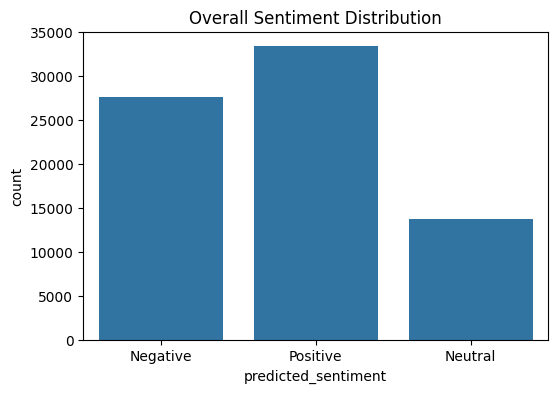

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.show()

In [8]:
topic_sentiment_counts = pd.crosstab(df['entity'], df['predicted_sentiment'])
topic_sentiment_counts.head(10)

predicted_sentiment,Negative,Neutral,Positive
entity,,,
Amazon,625,269,1422
ApexLegends,783,503,1090
AssassinsCreed,556,370,1318
Battlefield,1154,293,899
Borderlands,616,381,1289
CS-GO,679,415,1210
CallOfDuty,1005,346,1043
CallOfDutyBlackopsColdWar,927,546,903
Cyberpunk2077,665,516,1123


In [9]:
topic_sentiment_percent = pd.crosstab(
    df['entity'], 
    df['predicted_sentiment'], 
    normalize='index'
) * 100
topic_sentiment_percent = topic_sentiment_percent.round(2)
topic_sentiment_percent.head(10)

predicted_sentiment,Negative,Neutral,Positive
entity,,,
Amazon,26.99,11.61,61.40
ApexLegends,32.95,21.17,45.88
AssassinsCreed,24.78,16.49,58.73
Battlefield,49.19,12.49,38.32
Borderlands,26.95,16.67,56.39
CS-GO,29.47,18.01,52.52
CallOfDuty,41.98,14.45,43.57
CallOfDutyBlackopsColdWar,39.02,22.98,38.01
Cyberpunk2077,28.86,22.40,48.74


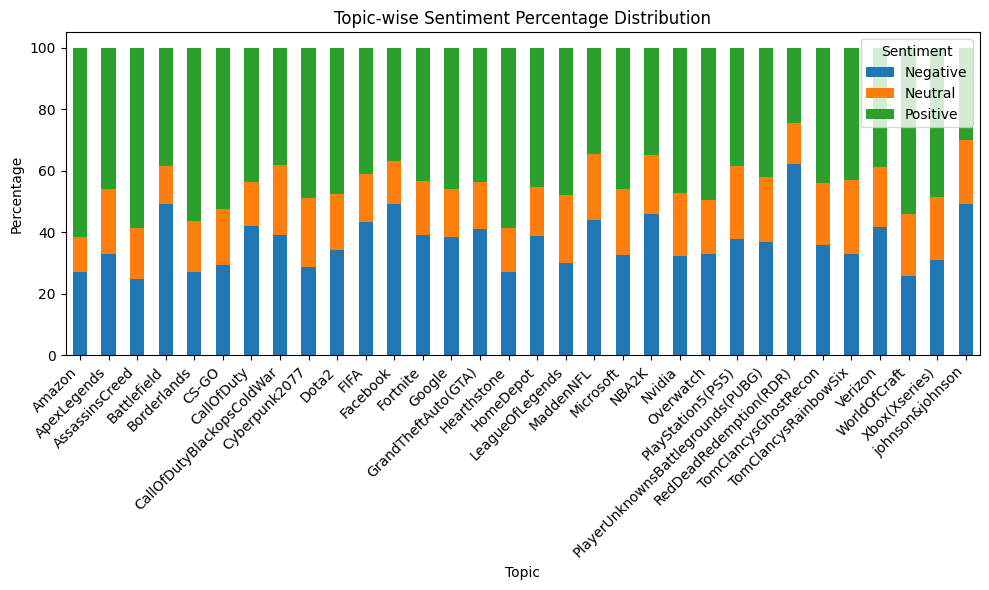

In [14]:
topic_sentiment_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.xlabel("Topic")
plt.ylabel("Percentage")
plt.title("Topic-wise Sentiment Percentage Distribution")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment")

plt.tight_layout()

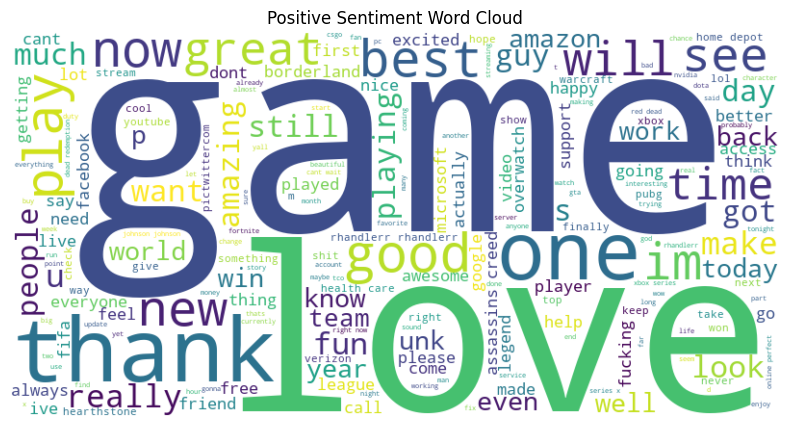

Saved positive_wordcloud.png


In [11]:
positive_text = " ".join(df[df['predicted_sentiment']=="Positive"]['clean_text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()

wordcloud.to_file("positive_wordcloud.png")
print("Saved positive_wordcloud.png")

In [12]:
df[['entity', 'text', 'predicted_sentiment']].sample(10)

,entity,text,predicted_sentiment
21062,CS-GO,"4k clutch, hope my last flip won't get me bann...",Positive
42492,PlayerUnknownsBattlegrounds(PUBG),HOW TO IMPRESS INDIAN GIRL. sahilyaduvanshi.in...,Positive
6253,Amazon,"""Directed by Michael Showalter, who also direc...",Positive
71195,TomClancysGhostRecon,left loving Wildlands but these daily challeng...,Positive
12132,NBA2K,Yo @NBA2K fuck your fake ass garbage ass game,Negative
57643,TomClancysRainbowSix,@ Rainbow6Game Fix your ranked elo system. Won...,Negative
12646,NBA2K,17 Sorry @NBA2K but I had made a seriously rou...,Negative
14333,Dota2,of,Neutral
7419,Overwatch,I love when a big man in his suit of armor pin...,Positive
38759,Hearthstone,I'm doing it bullshit: that new yogg-saron in ...,Negative
